In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

The dataset is from UCI Machine learning repository. It can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00360/)

In [2]:
data = pd.read_csv(r'C:\Users\AirQualityUCI\AirQualityUCI.csv', sep=';')

### **Data Description**
   * Data were recorded from March 2004 to February 2005.
   * The information from sensors were averaged hourly.
#### Features of the Dataset
   * Date (DD/MM/YYYY)
   * Time (HH.MM.SS)
   * True hourly averaged concentration CO in mg/m^3 (reference analyzer)
   * PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
   * True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
   * True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
   * PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
   * True hourly averaged NOx concentration in ppb (reference analyzer)
   * PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
   * True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
   * PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
   * PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
   * Temperature in Â°C
   * Relative Humidity (%)
   * AH Absolute Humidity

In [3]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [4]:
data.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)

In [5]:
data.isna().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

* Looking at the total null values. It seems like the error wasn't in the data but in the excel file. So removing the bottom 114 rows in the dataframe

In [6]:
data.tail(114)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.drop(range(9357, 9471), axis=0, inplace=True) # The dataset in the description says 9358 examples

In [8]:
data.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

#### Cleaning Data

In [9]:
data.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object

In [10]:
for i in data:
    if data[i].astype('str').str.contains(',').any():
        data[i] = data[i].str.replace(',', '.').astype('float')

In [11]:
data.Date = pd.to_datetime(data.Date) # Format = dd-mm-yy

In [12]:
import datetime as dt
data.Date.dt.strftime(('%Y'))

0       2004
1       2004
2       2004
3       2004
4       2004
        ... 
9352    2005
9353    2005
9354    2005
9355    2005
9356    2005
Name: Date, Length: 9357, dtype: object

* Lets use the year in date column and look if it does contribute to the model
* Also lets use the hour in the time column

In [13]:
model_data = data.copy()

In [14]:
model_data.Date = model_data.Date.dt.strftime('%Y').astype('int')

In [15]:
model_data.Time = model_data.Time.str[0:2].astype('int')

In [16]:
model_data.dtypes

Date               int32
Time               int32
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [17]:
model_data.describe()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2004.240141,11.498557,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,0.427192,6.923182,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,2004.000000,0.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,2004.000000,5.000000,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,2004.000000,11.000000,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2004.000000,18.000000,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,2005.000000,23.000000,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


### EDA

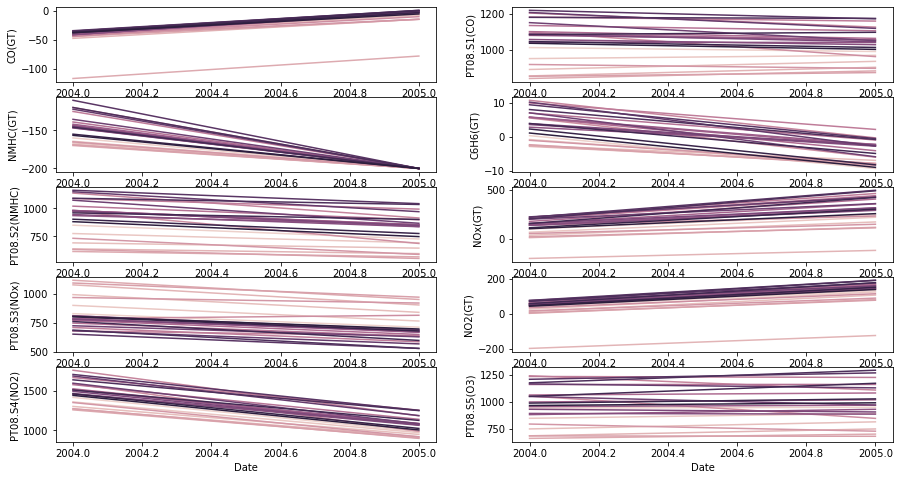

In [22]:
fig, ax = plt.subplots(5, 2, figsize=(15, 8))
ys = data.drop(['Date', 'Time', 'RH', 'AH', 'T'], axis=1).columns
ys = np.array(ys).reshape(5, 2)
for i in range(5):
    sns.lineplot(x='Date', y=ys[i, 0], hue='Time', data=model_data, ci=None, ax= ax[i, 0], legend=None)
    sns.lineplot(x='Date', y=ys[i, 1], hue='Time', data=model_data, ci=None, ax= ax[i, 1], legend=None)

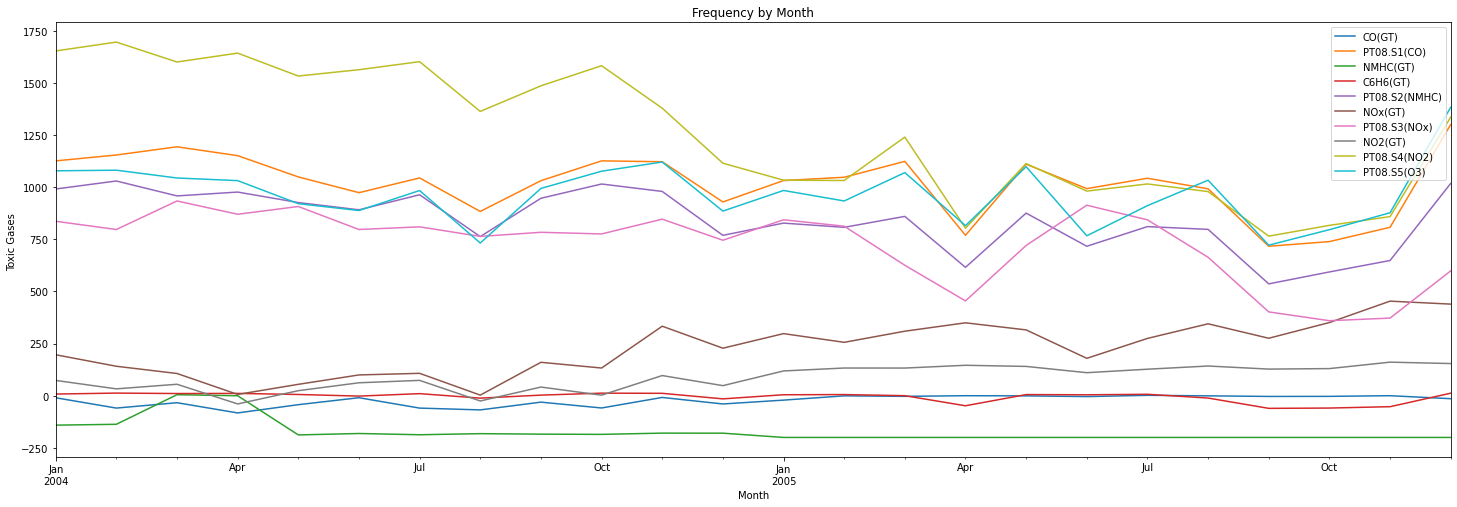

In [19]:
data.set_index('Date').drop(['Time', 'RH', 'AH', 'T'], axis=1).resample('M').mean().plot(figsize=(25, 8)) # plotting mean value for every month
plt.xlabel('Month')
plt.ylabel('Toxic Gases ')
plt.title("Frequency by Month");

* The graph above shows level of each gas averged every month

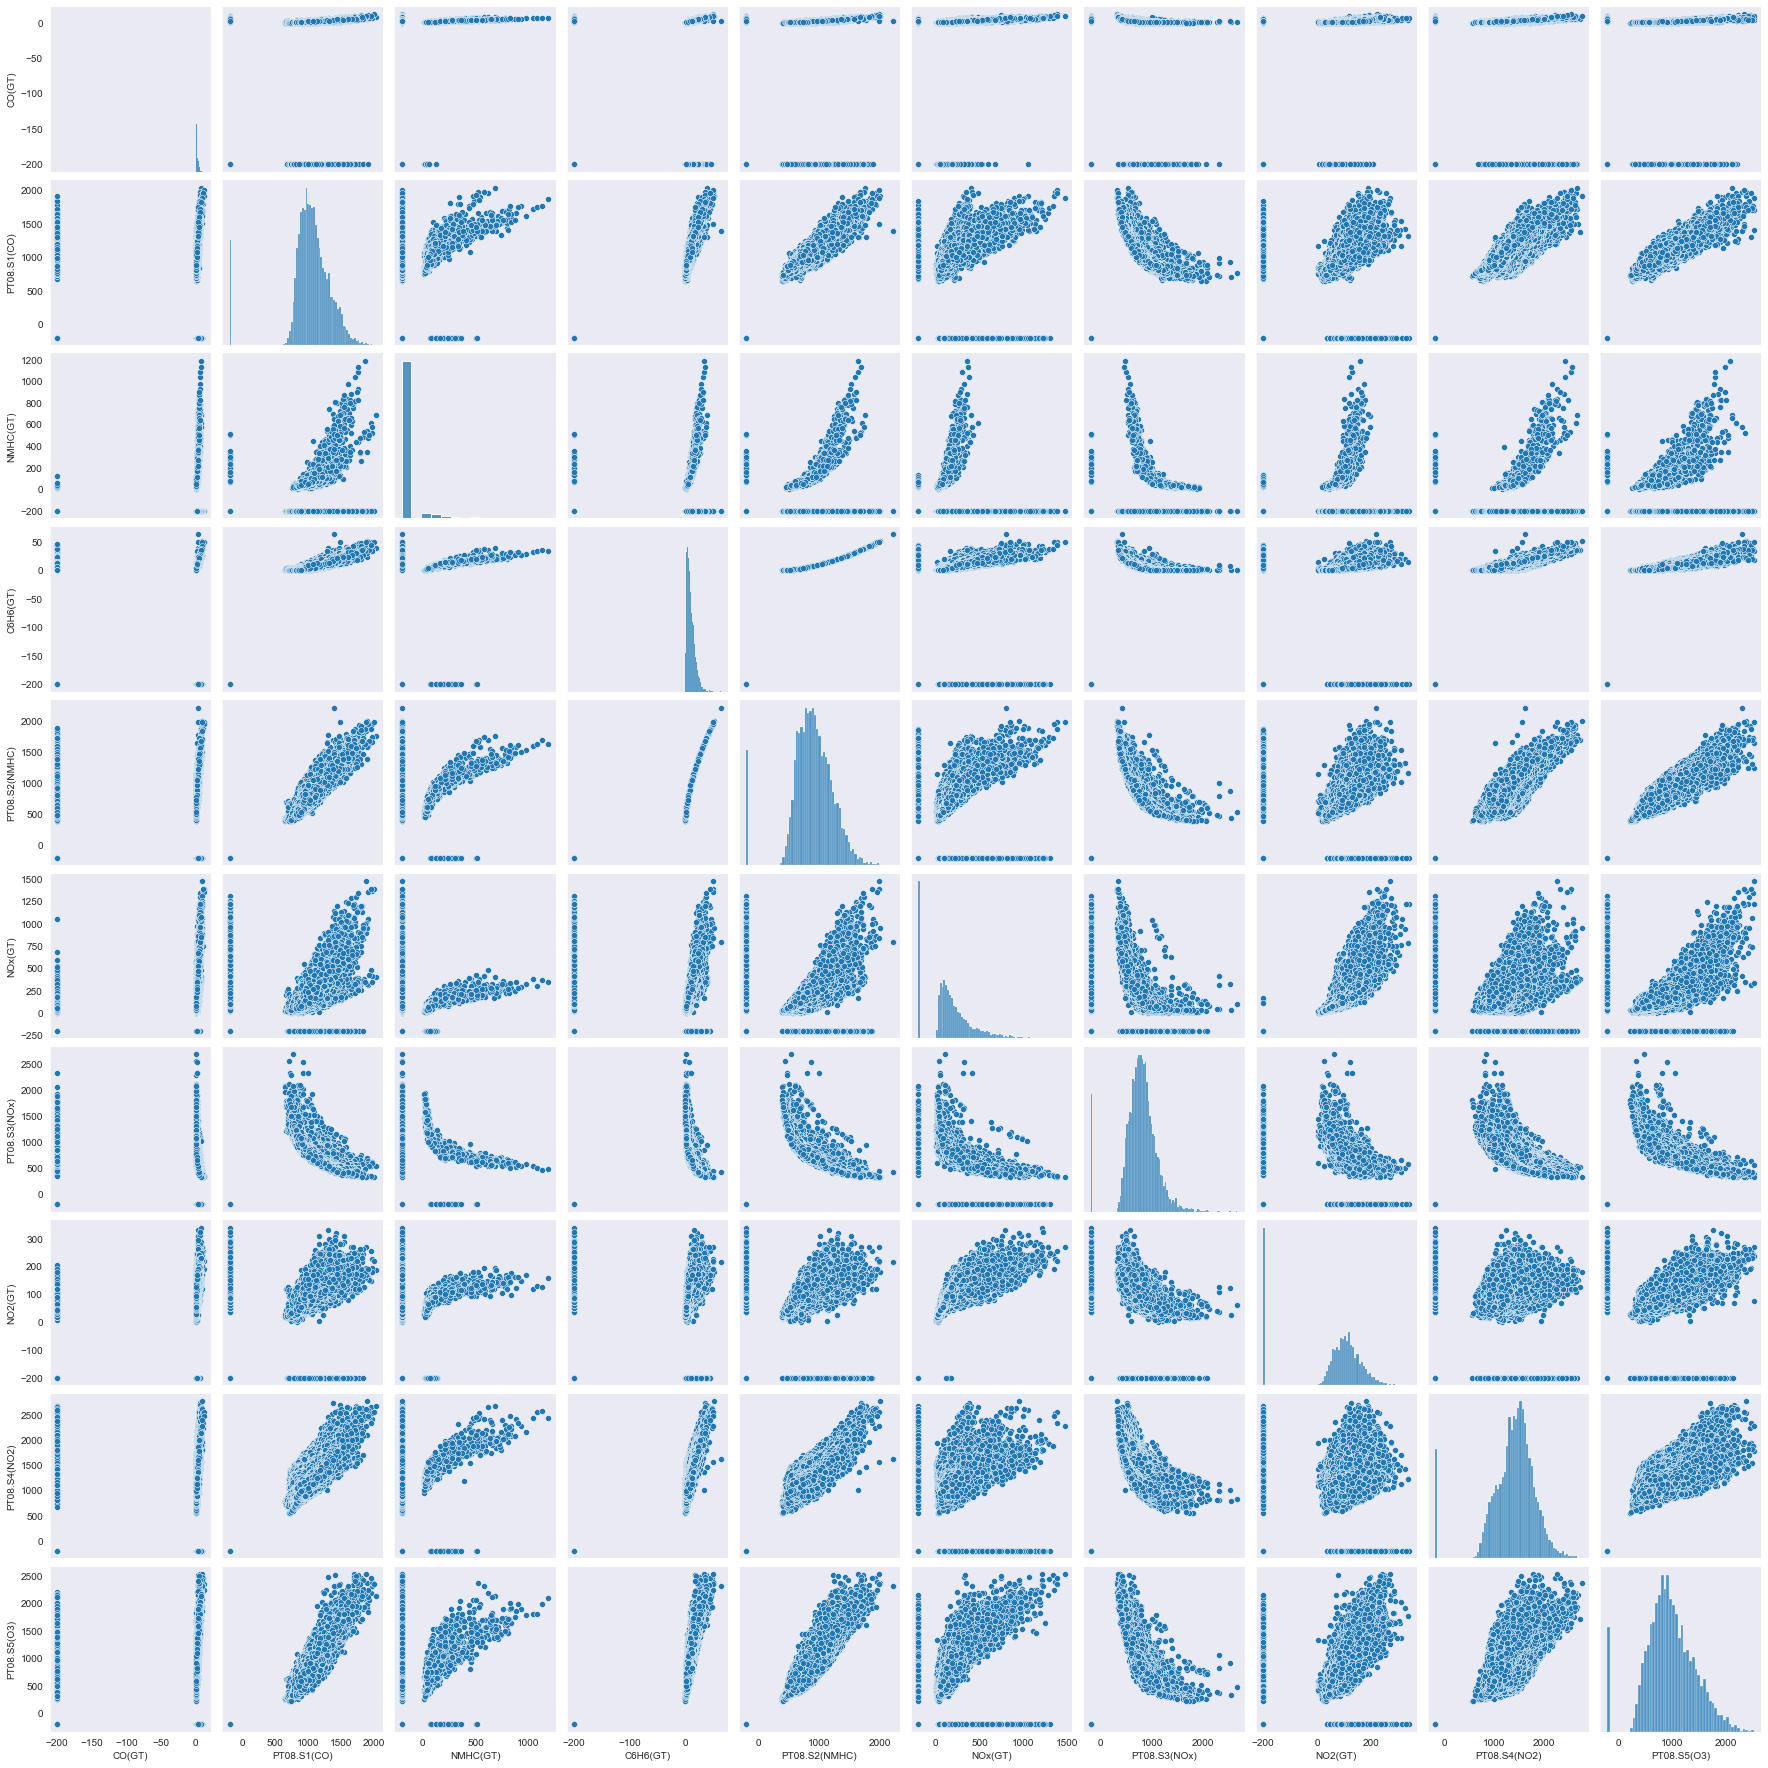

In [20]:
sns.set_style('dark')
eda_data = data.drop(['Time','RH','AH','T'], axis=1)
sns.pairplot(data.set_index('Date').drop(['Time','RH','AH','T'], axis=1))

#### Data preprocessing

In [23]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

   * Let's do a small check on whether or not adding Polynomial features has an effect

In [24]:
X, y = model_data.drop('NOx(GT)', axis=1), model_data['NOx(GT)']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [26]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet

In [27]:
scores_dataframe_orig = pd.DataFrame()
estimators = {
    'LR':LinearRegression(), 
    'Rid': Ridge(alpha=0.1, max_iter=1e5),
    'Lass': Lasso(alpha=0.1, max_iter=1e5),
    'Enet' : ElasticNet(alpha=0.1)
}

In [28]:
from warnings import filterwarnings
filterwarnings('ignore')  # covergence warnings

In [29]:
params_dataframe = pd.DataFrame(index=model_data.columns.drop('NOx(GT)'))


In [30]:
for estimator in estimators:
    est = estimators[estimator].fit(X_train, y_train)
    scores_dataframe_orig.loc['r2_score', type(est).__name__] = r2_score(y_test, est.predict(X_test))
    scores_dataframe_orig.loc['rmse', type(est).__name__] = np.sqrt(mean_squared_error(y_test, est.predict(X_test)))
    params_dataframe.loc[:, type(est).__name__] = est.coef_

In [31]:
scores_dataframe_orig

,LinearRegression,Ridge,Lasso,ElasticNet
r2_score,0.866999,0.866999,0.866986,0.862951
rmse,94.007937,94.007943,94.012502,95.427833


In [32]:
scores_polyfeatures = pd.DataFrame()
params_poly = pd.DataFrame(index=model_data.columns.drop('NOx(GT)'))

In [33]:
pf = PolynomialFeatures(degree=2)

In [34]:
sc = StandardScaler()

In [35]:
X_poly = pf.fit_transform(X)

In [36]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.3, random_state=24)

In [37]:
X_poly_train_sc = sc.fit_transform(X_poly_train)
X_poly_test_sc = sc.transform(X_poly_test)

In [38]:
for estimator in estimators:
    est = estimators[estimator].fit(X_poly_train_sc, y_poly_train)
    scores_polyfeatures.loc['r2_score', type(est).__name__] = r2_score(y_poly_test, est.predict(X_poly_test_sc))
    scores_polyfeatures.loc['rmse', type(est).__name__] = np.sqrt(mean_squared_error(y_poly_test, est.predict(X_poly_test_sc)))
    params_poly[type(est).__name__] = est.coef_[:14]

In [39]:
scores_polyfeatures 

,LinearRegression,Ridge,Lasso,ElasticNet
r2_score,0.956231,0.952016,0.935082,0.926533
rmse,53.929095,56.465676,65.678265,69.868645


* Clearly there is *difference* in *model score* when we added PolynomialFeatures
* **Note** : This is always NOT the case

### Model Building

  * Crossvalidation

In [40]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [41]:
alpha = np.geomspace(0.01, 2, 25)
ridcv = RidgeCV(alphas=alpha, cv=6)
ridcv = ridcv.fit(X_poly_train_sc, y_poly_train)
scores_polyfeatures.loc['r2_score', type(ridcv).__name__] = r2_score(y_poly_test, ridcv.predict(X_poly_test_sc))
scores_polyfeatures.loc['rmse', type(ridcv).__name__] = np.sqrt(mean_squared_error(y_poly_test, ridcv.predict(X_poly_test_sc)))
params_poly[type(ridcv).__name__] = est.coef_[:14]

### Lasso 

In [42]:
lasscv = LassoCV(alphas=alpha, cv=6)
lasscv = lasscv.fit(X_poly_train_sc, y_poly_train)
scores_polyfeatures.loc['r2_score', type(lasscv).__name__] = r2_score(y_poly_test, lasscv.predict(X_poly_test_sc))
scores_polyfeatures.loc['rmse', type(lasscv).__name__] = np.sqrt(mean_squared_error(y_poly_test, lasscv.predict(X_poly_test_sc)))
params_poly[type(lasscv).__name__] = est.coef_[:14]

### ElasticNet

In [43]:
Enet = ElasticNetCV(alphas=alpha, cv=6)
Enet = Enet.fit(X_poly_train_sc, y_poly_train)
scores_polyfeatures.loc['r2_score', type(Enet).__name__] = r2_score(y_poly_test, Enet.predict(X_poly_test_sc))
scores_polyfeatures.loc['rmse', type(Enet).__name__] = np.sqrt(mean_squared_error(y_poly_test, Enet.predict(X_poly_test_sc)))
params_poly[type(Enet).__name__] = est.coef_[:14]

In [44]:
scores_polyfeatures

,LinearRegression,Ridge,Lasso,ElasticNet,RidgeCV,LassoCV,ElasticNetCV
r2_score,0.956231,0.952016,0.935082,0.926533,0.954893,0.937755,0.933675
rmse,53.929095,56.465676,65.678265,69.868645,54.746641,64.311750,66.385814


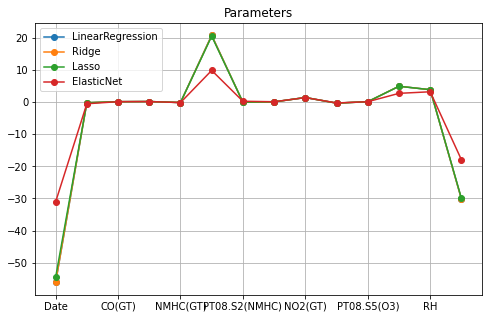

In [45]:
params_dataframe.plot(marker='o', figsize=(8, 5), use_index=True, title='Parameters')
plt.grid(True)
plt.show()

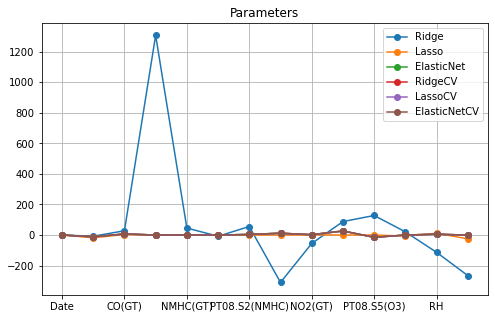

In [46]:
params_poly.drop('LinearRegression', axis=1).plot(marker='o', figsize=(8, 5), use_index=True, title='Parameters') 
plt.grid(True)
plt.show()

In [45]:
params_poly.RidgeCV

Date              0.000000
Time            -11.800663
CO(GT)            6.958329
PT08.S1(CO)       0.000000
NMHC(GT)          0.950308
C6H6(GT)         -0.365805
PT08.S2(NMHC)     3.859694
PT08.S3(NOx)     11.835471
NO2(GT)           2.063028
PT08.S4(NO2)     26.371251
PT08.S5(O3)     -15.155448
T                 0.000000
RH                5.094115
AH               -0.431136
Name: RidgeCV, dtype: float64

* Looking at the parameters of model, It is clear that encoding Date and time in this fashion doesnt have any contribution to the model and hence zeroed out

* Considering Ridge as the best model with NOx(GT) as our target, PT08.S4(NO2), AH had a bigger contribution and are positively correlated with NOx(GT)

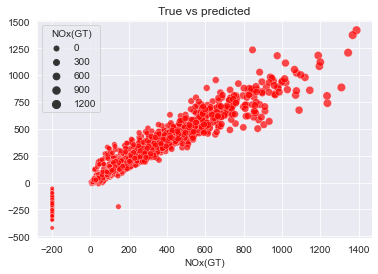

In [46]:
sns.scatterplot(y_test, estimators['Rid'].predict(X_poly_test_sc), color='red', alpha=0.7, size=y_test).set_title('True vs predicted')
plt.grid(True)
plt.show()

* Let's check if encoding the date column would in any way contribute to the model.
* We will use our best model from above.

In [47]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-10-03,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [48]:
model_data.Date = data.Date.dt.strftime('%y%m').apply(lambda x : '20' + str(x))

In [49]:
X, y = model_data.drop('NOx(GT)', axis=1), model_data['NOx(GT)']

In [50]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.3, random_state=24)

In [51]:
ridcv = ridcv.fit(sc.fit_transform(X_poly_train), y_poly_train)
r2_score(y_poly_test, ridcv.predict(sc.transform(X_poly_test)))

0.9548934267548395

In [52]:
ridcv.coef_, ridcv.alpha_

(array([ 0.00000000e+00, -6.54626647e+00,  6.03476980e+01,  2.19325350e+03,
        -1.82308164e+02, -3.79159874e+01, -7.90729319e+02, -5.22955590e+02,
        -2.70337914e+02,  2.49026109e+02, -3.15539293e+01, -2.15097281e+02,
        -6.18803756e+02, -5.74701551e+02, -6.57875583e+00, -6.54626682e+00,
        -3.11921913e+01,  2.11266204e+03,  4.60747624e+02, -3.79121240e+01,
        -4.19623083e+01, -8.87784495e+01,  2.55118809e+02, -1.17552564e+02,
         4.25477896e+02,  2.88096558e+02,  1.26218964e+02,  1.14793099e+02,
         7.65012400e+02, -5.50987212e+01, -9.36060544e+00,  1.16519705e+01,
         1.08533688e-01, -3.32318249e+02,  1.63925337e+01,  4.45498554e+00,
         2.30816739e+00,  1.95198771e+01,  2.49760445e+01,  3.59204291e+00,
        -2.89620999e+01,  3.22456462e+02,  4.32048355e+03, -2.49486883e+01,
         4.92181982e-01, -1.99384415e+02,  1.55677659e+02,  7.48824949e+00,
         1.98645568e+00, -5.92778138e+01, -1.23920713e+01,  2.03466190e+01,
         2.1

* The date column didnt have any contribution here as well. So the model should not change even if the Date column is dropped.

## Summary 
* The dataset consisted of different gases and we chose NOx(Nitric Oxide) as our target. Remember you could chose other gases your target as they are continuous too.
* We've used a Linear model, Ridge regression, Lasso regression and elasticnet
* The scores of Linear Regression and Ridge regression were similar and comparatively high.
* We've chosen ridge as our best model with alpha=0.01 because it explained coefficients better than the other models.
* Looking at the parameters of ridge  model features **PT08.S4(NO2)**, **AH** we strongly postively correlated causing an increase in the pollution and **NHMC** was negatively correlated with **NOx(GT)**

## Results
R2 Score: R2 Score is calculated using the formula 
$RSS = 1 - \sum \limits _{i=1} ^n \frac{(\hat{y}_{i} - {y}_i)^2} {({y}_i - \bar{y}_i)^2} $
* The R2 score of the ridge model was 0.954893, which means 95 percent of the changes in the NOx can be explained by these features.
* The Root Mean Square Error (RMSE) is the standard deviation of the residuals. Residuals are a measure of how far from the regression line data points are. rmsw was 54 which was smaller compared to other models

### Plotting the residuals

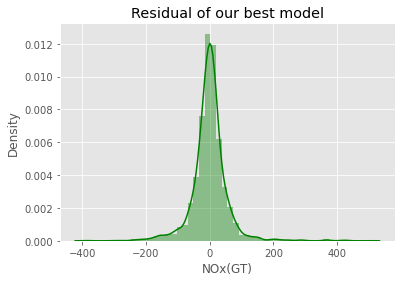

In [50]:
sns.distplot((y_test - estimators['Rid'].predict(X_poly_test_sc)), color='green').set_title('Residual of our best model')
plt.show()